# Part II - Ford GoBike Trip Data Visualization
## by K Wood

## Investigation Overview


The main purpose of this investigation is to provide an overview of who the median Bikeshare user is as well as when and where they use these bicycles. 


## Dataset Overview

The dataset used for this analysis contains 183412 observations, each providing information about a single trip. We are able to discern the bikeshare user's gender, age, time of use, and location where the bike was rented from. This data was collected from trips taken in February from the San Francisco, San Jose, Oakland and Berkeley locations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import plotly.express as px #used for mapping
%matplotlib inline
import warnings
warnings.simplefilter("ignore")


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_noNaN=df.dropna()

In [3]:
#create age variable using member_birth_year and time of trip
df_noNaN['age']  = 2019 - df_noNaN.loc[:,['member_birth_year']]
#drop erroneous ages above 100 (here, I make the assumption that no 100 year old used this Bikeshare 
    # and it is a data entry error)
df_noNaN.drop(df_noNaN[df_noNaN['age'] >= 100].index, inplace = True)

bins = [18, 20, 30, 40, 50, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50+']
df_noNaN['age_band'] = pd.cut(df_noNaN.age, bins, labels = labels,include_lowest = True)

# plot a simple pie chart

sorted_counts = df_noNaN['age_band'].value_counts()

## Visualization 1

The largest share of users are between age 20 and 29. The second most popular age band for Bikeshare users is 30 to 39. Substantially less users are over the age of 40. 

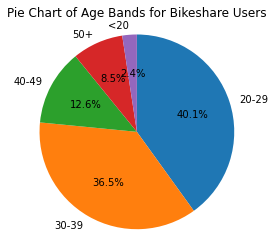

In [4]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%', counterclock = False);
plt.axis('square');
plt.title('Pie Chart of Age Bands for Bikeshare Users');

## Visualization 2

The vast majority of bikeshare users are male. There are nearly 3 times as many males as female users.

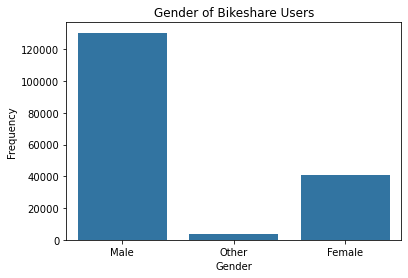

In [5]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_noNaN, x='member_gender', color=base_color);
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender of Bikeshare Users');

## Visualization 3

The distribution of trips by hour of the day appears to be bimodal. The highest frequency appears to occur within the 9th and 18th hours of the day. In other words, bikeshare users utilize the bikes most between 8am-9am and 5pm-6pm, common work commuter hours.

The majority of bike rentals occur during the weekdays. Taken together with the prior figure that shows that most users utilize the bikes between 8am-9am and 5pm-6pm, it seems that the bulk of the user base are commuting to work.

In [6]:
#Use the start time variable to create variables of month, day, and hour
df_noNaN['month'] = pd.DatetimeIndex(df_noNaN['start_time']).month
df_noNaN['day'] = pd.DatetimeIndex(df_noNaN['start_time']).day
df_noNaN['hour'] = pd.DatetimeIndex(df_noNaN['start_time']).hour
df_noNaN['day_of_week'] = pd.DatetimeIndex(df_noNaN['start_time']).weekday

hours_order = sorted(df_noNaN['hour'].value_counts().index)
a_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
base_color = sb.color_palette()[0]

days_order = sorted(df_noNaN['day_of_week'].value_counts().index)
day_name_list= ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

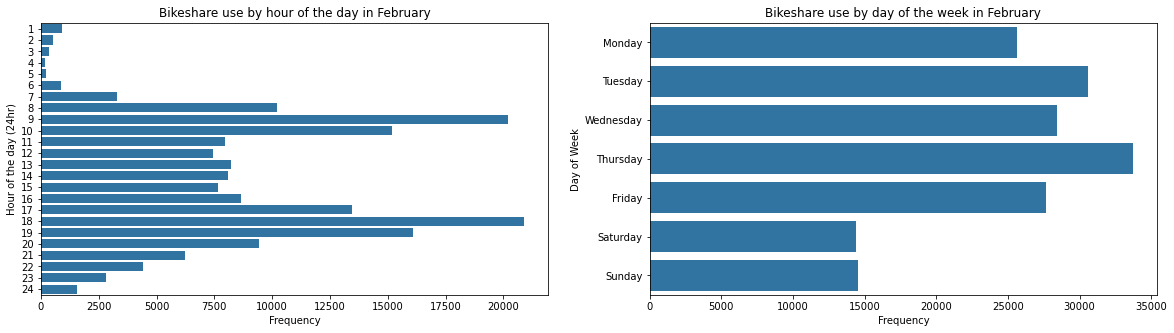

In [7]:
# Define the figure size
plt.figure(figsize = [20, 5])


# histogram on left: Male
#order by day
plt.subplot(1, 2, 1)

#plot bar graph
sb.countplot(data=df_noNaN, y='hour', color=base_color, order=hours_order);
plt.xlabel('Frequency')
plt.ylabel('Hour of the day (24hr)')
plt.yticks(hours_order, a_list)
plt.title('Bikeshare use by hour of the day in February');

# histogram on right: Female
#order by day of week (note: Monday is 0)
plt.subplot(1, 2, 2)
#plot bar graph
sb.countplot(data=df_noNaN, y='day_of_week', color=base_color, order=days_order);
plt.xlabel('Frequency')
plt.ylabel('Day of Week')
plt.yticks(days_order, day_name_list)
plt.title('Bikeshare use by day of the week in February');

## Visualization 4

The majority of Bikeshare users are Subscribers. Taken together with the fact that the majority of trips are during peak commuting hours, it suggests that the bulk of users utilize these bikes as an integral part of their commute.

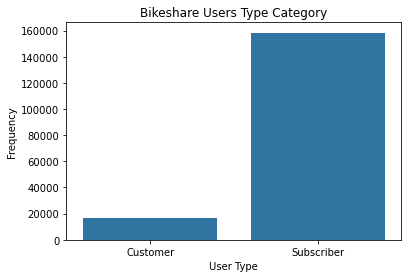

In [8]:
sb.countplot(data=df_noNaN, x='user_type', color=base_color);
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('Bikeshare Users Type Category');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# I use jupyter nbconvert to generate an HTML slide show
!jupyter nbconvert Part_II_notebook_Kwood.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_notebook_Kwood.ipynb to slides
[NbConvertApp] Writing 647363 bytes to Part_II_notebook_Kwood.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook_Kwood.slides.html
Use Control-C to stop this server
^C

Interrupted
